# <center>   
   # <center> A machine learning Predictive Model

# Table of Contents

1. **[Project Background](#1)**
2. **[Exploratory Data Analysis and vizsualization](#2)**
3. **[Research Methods](#3)**
4. **[Data Cleansing](#4)**
5. **[Feature Engineering](#5)**
6. **[Model Selection](#6)**
7. **[Performance Optimization](#7)**
7. **[Experiment](#8)**
7. **[Conclusion & Recommendations](#8)**

# Part 1. Project Background

![](https://miro.medium.com/max/2726/1*ra5Opk-6Fy1wH0IPXiankA.png)

The goal of this project is to build a predictive model for the housing prices of California. The dataset if from the 1990 Census. The final data contained 20,640 observations on 9 variables. The dependent variable is ln(median house value). House value is extremely valuable to investors and predicting this information can maximize profits. Is it all location, location, location? Or are there other variables to consider? We will find out!

# Part 2. Exploratory Data Analysis and Visualization

## Load the raw data


Like I said before its from the 1990 Census. It is publicly available here https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

Its difficult to get, I had to unzip twice and use a program that I'm not at liberty to discuss to get this data. 

In [69]:
#import packages

import numpy as np
import numpy.random as nr
import math
import pandas as pd
import seaborn as sns
from statsmodels.stats.anova import anova_lm
from sklearn.preprocessing import StandardScaler
import scipy.stats as ss
import matplotlib.pyplot as plt
import statsmodels.api as sm  #Regression

# Use inline magic command so plots appear in the data frame
%matplotlib inline

#import data
df = pd.read_csv('C:\\Users\Owner\Documents\DataScience\proj5Cal_Housing.csv')

print(df.columns)
print(df.head)
df.describe()

# OH shit, we need column headers, or else none of this makes sense. 
df.columns = ['Longitude', 'Latitude','HousingMedianAge','TotalRooms','TotalBedrooms','Population','Households','MedianIncome','MedianHouseValue']
print(df.head)

Index(['-122.23', '37.88', '41', '880', '129', '322', '126', '8.3252',
       '452600'],
      dtype='object')
<bound method NDFrame.head of        -122.23  37.88  41   880     129   322   126  8.3252  452600
0      -122.22  37.86  21  7099  1106.0  2401  1138  8.3014  358500
1      -122.24  37.85  52  1467   190.0   496   177  7.2574  352100
2      -122.25  37.85  52  1274   235.0   558   219  5.6431  341300
3      -122.25  37.85  52  1627   280.0   565   259  3.8462  342200
4      -122.25  37.85  52   919   213.0   413   193  4.0368  269700
...        ...    ...  ..   ...     ...   ...   ...     ...     ...
20634  -121.09  39.48  25  1665   374.0   845   330  1.5603   78100
20635  -121.21  39.49  18   697   150.0   356   114  2.5568   77100
20636  -121.22  39.43  17  2254   485.0  1007   433  1.7000   92300
20637  -121.32  39.43  18  1860   409.0   741   349  1.8672   84700
20638  -121.24  39.37  16  2785   616.0  1387   530  2.3886   89400

[20639 rows x 9 columns]>
<bound method ND

Getting more info

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20639 entries, 0 to 20638
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Longitude         20639 non-null  float64
 1   Latitude          20639 non-null  float64
 2   HousingMedianAge  20639 non-null  int64  
 3   TotalRooms        20639 non-null  int64  
 4   TotalBedrooms     20432 non-null  float64
 5   Population        20639 non-null  int64  
 6   Households        20639 non-null  int64  
 7   MedianIncome      20639 non-null  float64
 8   MedianHouseValue  20639 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 1.4 MB


Good, no nulls to delete

In [20]:
#Seeing more descriptive data
df.describe()


,Longitude,Latitude,HousingMedianAge,TotalRooms,TotalBedrooms,Population,Households,MedianIncome,MedianHouseValue
count,20639.000000,20639.000000,20639.000000,20639.000000,20432.000000,20639.000000,20639.000000,20639.000000,20639.000000
mean,-119.569576,35.631753,28.638888,2635.848152,537.890564,1425.530210,499.557779,3.870455,206843.910122
std,2.003495,2.135947,12.585568,2181.633870,421.385673,1132.463507,382.330173,1.899615,115385.731702
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1448.000000,296.000000,787.000000,280.000000,2.563100,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534700,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.742850,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Lets viz the columns

array([[<AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'HousingMedianAge'}>],
       [<AxesSubplot:title={'center':'TotalRooms'}>,
        <AxesSubplot:title={'center':'TotalBedrooms'}>,
        <AxesSubplot:title={'center':'Population'}>],
       [<AxesSubplot:title={'center':'Households'}>,
        <AxesSubplot:title={'center':'MedianIncome'}>,
        <AxesSubplot:title={'center':'MedianHouseValue'}>]], dtype=object)

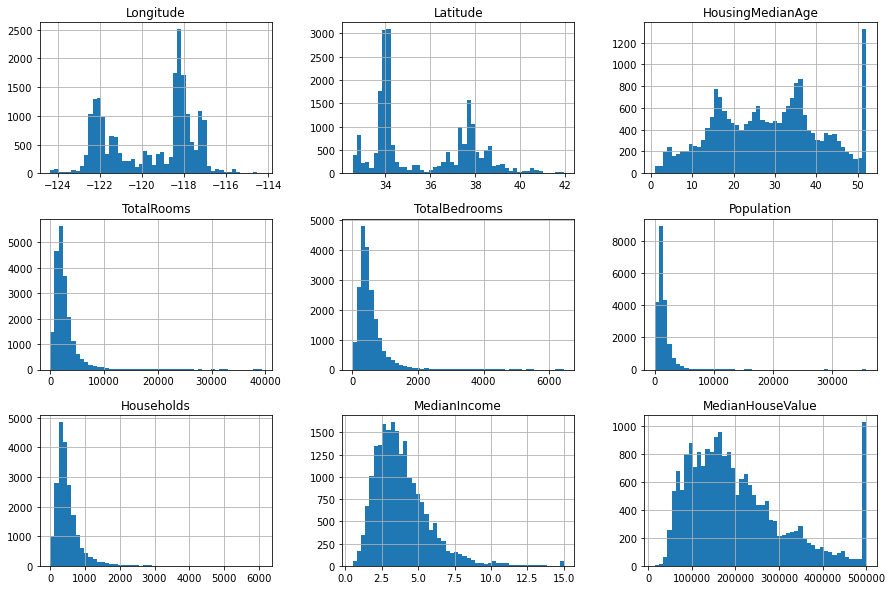

In [21]:
df.hist(bins=50,figsize=(15,10))
#this is just to see trends. Some of the axis are skewed heavily, (amount of bedrooms) so let's use common sense here

In [33]:
num_features=['Longitude', 'Latitude','HousingMedianAge','TotalRooms','TotalBedrooms','Population','Households','MedianIncome','MedianHouseValue']

In [36]:
#Checking for skewness
skewness=[]
for i in num_features:
    skewness.append(df[i].skew())
pd.DataFrame(data=skewness,index=num_features,columns=['skewness']).sort_values(by='skewness',ascending=False)

,skewness
Population,4.935982
TotalRooms,4.147347
TotalBedrooms,3.459603
Households,3.410495
MedianIncome,1.646991
MedianHouseValue,0.977903
Latitude,0.466076
HousingMedianAge,0.060430
Longitude,-0.297912


Possibly view on the map

Text(0.5, 1.0, 'Distribution of households')

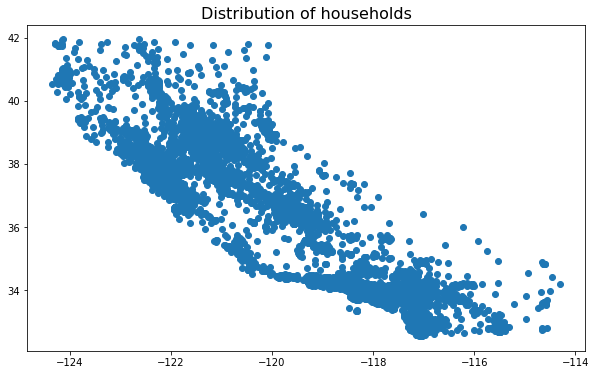

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(x=df['Longitude'],y=df['Latitude'])
plt.title("Distribution of households",size=16)

Hmmm...Kinda looks like...California. Let's superimpose a map!

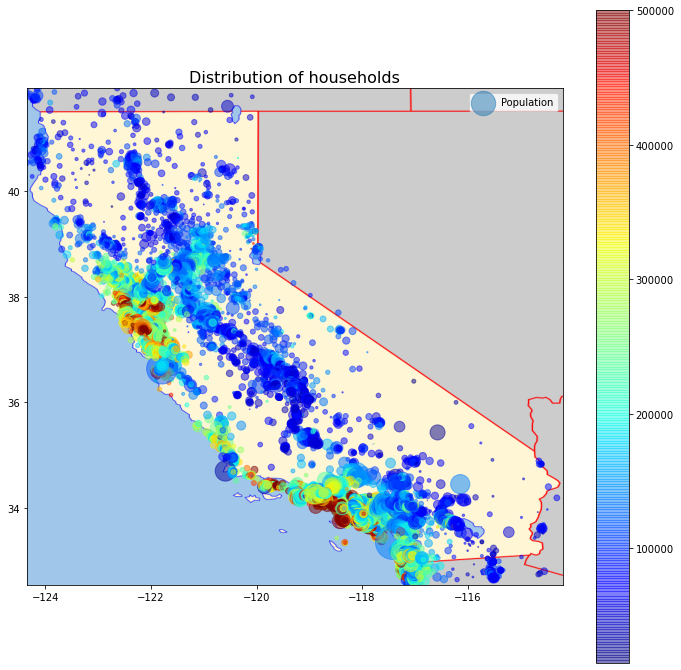

In [24]:
plt.figure(figsize=(12,12))
img=plt.imread('C:\\Users\Owner\Documents\DataScience\california.png')
plt.imshow(img,zorder=0,extent=[-124.35,-114.2,32.54,41.95])

plt.scatter(x=df['Longitude'],y=df['Latitude'],alpha=0.5,s=df['Population']/30,c=df['MedianHouseValue'],
            cmap=plt.get_cmap("jet"),zorder=1,label='Population')
plt.colorbar()
plt.title("Distribution of households",size=16)
plt.legend()

Overlap with image isn't precise, but its a good representation. Some takeaways is that location matters and population density matters. Let's see what else matters. 

In [25]:
corr_matrix=df.corr()

In [26]:
corr_matrix['MedianHouseValue'].sort_values(ascending=False)

MedianHouseValue    1.000000
MedianIncome        0.688000
TotalRooms          0.134253
HousingMedianAge    0.105536
Households          0.065952
TotalBedrooms       0.049794
Population         -0.024552
Longitude          -0.045837
Latitude           -0.144289
Name: MedianHouseValue, dtype: float64

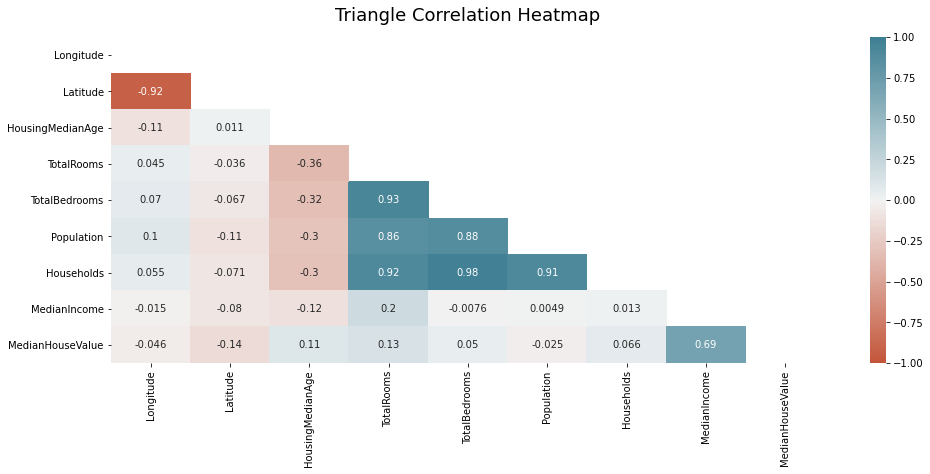

In [37]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr()))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(20, 220, n=200))
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

Looks like total Bedrooms, poopulation, and households are correlated with each other. 

Looking at outliers, and possibly removing them

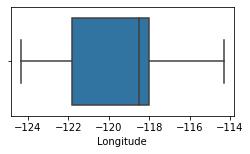

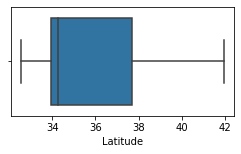

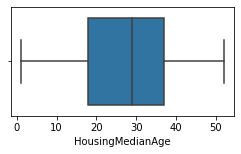

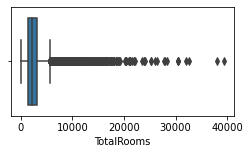

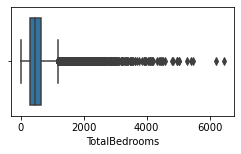

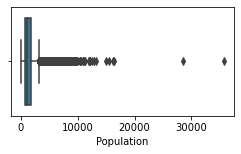

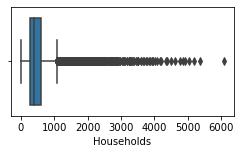

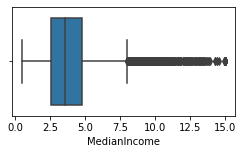

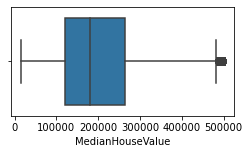

In [42]:
num_features=['Longitude', 'Latitude','HousingMedianAge','TotalRooms','TotalBedrooms','Population','Households','MedianIncome','MedianHouseValue']

for i in num_features:
    fig, ax = plt.subplots()
    fig.set_size_inches(4,2)
    #plt.xlim(-10,10)
    sns.boxplot(x=i, data=df,ax=ax)

We're going to remove some of these outliers in Part 4 (data cleansing). 

# Part 3. Research Methods <a id="3"></a>


We are tasked to calculate the sample correlation between at least one pair of variables. Come up with a hypothesis and calculate the p-value. I have decided to investigate the correlation between total rooms and price

                            OLS Regression Results                            
Dep. Variable:       MedianHouseValue   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.053e+33
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:30:56   Log-Likelihood:             4.3034e+05
No. Observations:               20639   AIC:                        -8.607e+05
Df Residuals:                   20637   BIC:                        -8.607e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
MedianHouseValue     1.0000   1.29e-17  

Text(0.5, 1.0, 'Relationship between Rooms and MdianHouseValue')

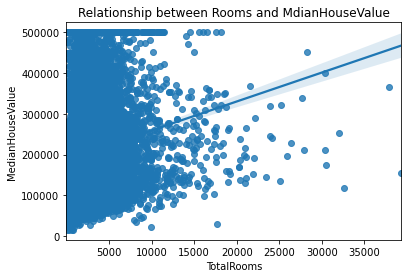

In [74]:
## Add a constant term to the array of predictors to get an intercept term
predictors = sm.add_constant(df.MedianHouseValue, prepend = False)

lm_mod = sm.OLS(df.MedianHouseValue, predictors)
res = lm_mod.fit()
print(res.summary())

#print scatter plot of RM and MEDV
sns.regplot(y="MedianHouseValue", x="TotalRooms", data=df, fit_reg = True)
plt.title("Relationship between Rooms and MdianHouseValue")

So there's way too much data and features to make trends. We'll need to process this data better

In [75]:
from scipy import stats
def t_one_sample(samp, mu = 0.0, alpha = 0.1):
    '''Function for two-sided one-sample t test'''
    t_stat = stats.ttest_1samp(samp, mu)
    scale = np.std(samp)
    loc = 28.44
    ci = stats.t.cdf(alpha/2, len(samp), loc=mu, scale=scale)
    print('Results of one-sample two-sided t test')
    print('Mean         = %4.3f' % loc)
    print('t-Statistic  = %4.3f' % t_stat[0])
    print('p-value      < %4.3e' % t_stat[1])
    print('On degrees of freedom = %4d' % (len(samp) - 1))
    print('Confidence Intervals for alpha =' + str(alpha))
    print('Lower =  %4.3f Upper = %4.3f' % (loc - ci, loc + ci))
    
t_one_sample(df.MedianHouseValue)  

Results of one-sample two-sided t test
Mean         = 28.440
t-Statistic  = 257.534
p-value      < 0.000e+00
On degrees of freedom = 20638
Confidence Intervals for alpha =0.1
Lower =  27.940 Upper = 28.940


# Part 4. Cleansing And Preprocessing <a id="4"></a>


With a sound knowledge of the distribution of key variables, further analysis of each customer characteristic can be carried out to investigate its influence on the subscription rate.

![qwe](https://media3.giphy.com/media/l378c04F2fjeZ7vH2/giphy.gif)

### 4.1 Removing outliers

In [44]:
from sklearn.base import BaseEstimator,TransformerMixin,RegressorMixin

class RemoveOutliers(BaseEstimator,TransformerMixin):
    """This class removes outliers from data.
    Note: Outlier values are hard coded
    """
    def fit (self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        X=X[(X['MedianHouseValue']!=500001) | (X['MedianIncome']>=2)].reset_index(drop=True)
        X=X[X['MedianIncome']<=11].reset_index(drop=True)
        X=X[(X['MedianHouseValue']!=350000) | (X['MedianIncome']>=1.5)].reset_index(drop=True)
        X=X[(X['MedianHouseValue']!=450000) | (X['MedianIncome']>=2)].reset_index(drop=True)
        X=X[(X['MedianHouseValue']>=350000) | (X['MedianIncome']<=9.5)].reset_index(drop=True)
        X=X[X['Population']<=9000]
        #X=X[(X['population_per_household']>=1.15) & (X['population_per_household']<=6.5)]
        #X=X[X['rooms_per_household']<20]
        #X=X[X['bedrooms_per_room']<0.5].reset_index(drop=True)
        return X
    
    #https://github.com/sonarsushant/California-House-Price-Prediction/blob/master/EDA%20and%20Data%20Cleaning.ipynb

### 4.1 Removing outliers


In [45]:
df1=RemoveOutliers().fit_transform(df)

### 4.2  Removing nulls

In [46]:
#Get number of Null Values
def get_null_count(data):
    for i in data.columns:
        print(i,': ',len(data[df[i].isnull()][i]))

In [47]:
get_null_count(df)

Longitude :  0
Latitude :  0
HousingMedianAge :  0
TotalRooms :  0
TotalBedrooms :  207
Population :  0
Households :  0
MedianIncome :  0
MedianHouseValue :  0


In [55]:
data_null=df[df['TotalBedrooms'].isnull()]

Plotting nulls to see if there are any patterns. For example, if they are in a certain region or not. 

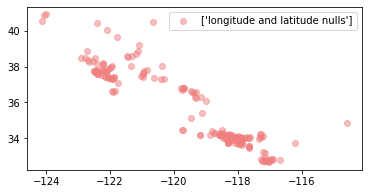

In [63]:

plt.figure(figsize=(6,3))
plt.scatter(x=data_null['Longitude'],y=data_null['Latitude'],alpha=0.5, color="lightcoral", label=['longitude and latitude nulls']) 
plt.legend()

 Replacing the nulls with a median value

In [67]:
#replacing the nulls with median value
df['TotalBedrooms'] = df['TotalBedrooms'].fillna(df['TotalBedrooms'].median())

### 4.3 Scaling data

Now let's scale all numerical features (it is useful for the linear models), prepare cross validation splits and we are ready to proceed to modeling

### 4.4 Multicolinearity (possibly)

In [ ]:
#https://github.com/sonarsushant/California-House-Price-Prediction/blob/master/EDA%20and%20Data%20Cleaning.ipynb

### 4.5 Transform skewed data (possibly)

In [ ]:
#https://github.com/sonarsushant/California-House-Price-Prediction/blob/master/EDA%20and%20Data%20Cleaning.ipynb

# Part 5. Feature Engineering <a id="5"></a>


### 5.1 Adding features

### 5.2 Removing features

In [81]:
Features = np.array(df[['Longitude', 'Latitude','HousingMedianAge','TotalRooms','TotalBedrooms','Population','Households','MedianIncome']])

#above are the defined features (all 8 while MedianHouseValue is the label)

### 5.3 Split the dataset

In [83]:
##5.3 split the dataset

import sklearn.model_selection as ms
## Randomly sample cases to create independent training and test data
nr.seed(9988)
labels = np.array(df['MedianHouseValue'])

indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 300) #total rows is roughly 2000
x_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

### 5.4 Scale the data

In [84]:
scaler = preprocessing.StandardScaler().fit(x_train[:,9:]) #The 
x_train[:,9:] = scaler.transform(x_train[:,9:])
x_test[:,9:] = scaler.transform(x_test[:,9:])
print(x_train.shape)
x_train[:2,:]

NameError: name 'preprocessing' is not defined

# Part 6. ML Model Selection <a id="6"></a>


In [ ]:
#load the cleaned dataset

Dataset changes so far...
1)	Default

2)	Delete the rows which column 'poutcome' contains 'other'

3)	Getting ‘Balance’ outliers

4)	Drop ‘balance’ outliers and Change column name: 'y' to 'response'

5)	Drop column "contact" which is useless

6)	Drop rows that 'duration' < 5s

7)	Drop customer values with 'other' education


Still needs to be cleaned a little

Eliminate low variance features

In [ ]:
from sklearn import feature_selection as fs

print(Features.shape)

## Define the variance threhold and fit the threshold to the feature array. 
sel = fs.VarianceThreshold(threshold=(.8 * (1 - .8)))
Features_reduced = sel.fit_transform(Features)

## Print the support and shape for the transformed features
print(sel.get_support())
print(Features_reduced.shape)

In [ ]:
## Reshape the Label array
Labels = Labels.reshape(Labels.shape[0],)

## Set folds for nested cross validation
nr.seed(988)
feature_folds = ms.KFold(n_splits=10, shuffle = True)

## Define the model
logistic_mod = linear_model.LogisticRegression(C = 10, class_weight = {0:0.45, 1:0.55}) 

## Perform feature selection by CV with high variance features only
nr.seed(6677)
selector = fs.RFECV(estimator = logistic_mod, cv = feature_folds,
                      scoring = 'roc_auc')
selector = selector.fit(Features_reduced, Labels)
selector.support_ 

In [ ]:
selector.ranking_

Features_reduced = selector.transform(Features_reduced)
Features_reduced.shape

Now features are at 13

In [ ]:
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.title('Mean AUC by number of features')
plt.ylabel('AUC')
plt.xlabel('Number of features')

## Apply nested cross validation to create model

The next step is to use nested cross validation to optimize the model hyperparameter and test the model performance. The model is constructed using the features selected. 

As a first step, construct the inside and outside folds for the nested cross validation by running the code in the cell below. 

In [ ]:
Labels = Labels.reshape(Labels.shape[0],)
scoring = ['precision_macro', 'recall_macro', 'roc_auc']
logistic_mod = linear_model.LogisticRegression(C = 1.0, class_weight = {0:0.45, 1:0.55}) 
scores = ms.cross_validate(logistic_mod, Features, Labels, scoring=scoring,
                        cv=10, return_train_score=False)

In [ ]:
def print_format(f,x,y,z):
    print('Fold %2d    %4.3f        %4.3f      %4.3f' % (f, x, y, z))

def print_cv(scores):
    fold = [x + 1 for x in range(len(scores['test_precision_macro']))]
    print('         Precision     Recall       AUC')
    [print_format(f,x,y,z) for f,x,y,z in zip(fold, scores['test_precision_macro'], 
                                          scores['test_recall_macro'],
                                          scores['test_roc_auc'])]
    print('-' * 40)
    print('Mean       %4.3f        %4.3f      %4.3f' % 
          (np.mean(scores['test_precision_macro']), np.mean(scores['test_recall_macro']), np.mean(scores['test_roc_auc'])))  
    print('Std        %4.3f        %4.3f      %4.3f' % 
          (np.std(scores['test_precision_macro']), np.std(scores['test_recall_macro']), np.std(scores['test_roc_auc'])))

print_cv(scores)    

Notice that there is considerable variability in each of the performance metrics from fold to fold. Even so, the standard deviations are at least an order of magnitude than the means. It is clear that any one fold does not provide a representative value of the performance metrics. The later is a key point as to why cross validation is important when evaluating a machine learning model.

In [ ]:
nr.seed(123)
inside = ms.KFold(n_splits=10, shuffle = True)
nr.seed(321)
outside = ms.KFold(n_splits=10, shuffle = True)

In [ ]:
## Fit thhe cross validated grid search over the data 
clf.fit(Features, Labels)
keys = list(clf.cv_results_.keys())
for key in keys[6:16]:
    print(clf.cv_results_[key])
## And print the best parameter value
clf.best_estimator_.C

In [ ]:
def plot_cv(clf, params_grid, param = 'C'):
    params = [x for x in params_grid[param]]
  
    keys = list(clf.cv_results_.keys())              
    grid = np.array([clf.cv_results_[key] for key in keys[6:16]])
    means = np.mean(grid, axis = 0)
    stds = np.std(grid, axis = 0)
    print('Performance metrics by parameter')
    print('Parameter   Mean performance   STD performance')
    for x,y,z in zip(params, means, stds):
        print('%8.2f        %6.5f            %6.5f' % (x,y,z))
    
    params = [math.log10(x) for x in params]
    
    plt.scatter(params * grid.shape[0], grid.flatten())
    p = plt.scatter(params, means, color = 'red', marker = '+', s = 300)
    plt.plot(params, np.transpose(grid))
    plt.title('Performance metric vs. log parameter value\n from cross validation')
    plt.xlabel('Log hyperparameter value')
    plt.ylabel('Performance metric')
    
plot_cv(clf, param_grid)    

Four different classification algorithms (Logistic Regression, K-Neighbors Classifier, Decision Tree Classifier, and Gaussian NB) are run on the dataset and the best-performing one will be used to build the classification model.  

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))



# Part 7. Performance Optimization <a id="7"></a>


### 7.1 Feature Elimination

### 7.2

# Part 8. Experimentation <a id="8"></a>


# Part 7. Conclusion and Recommendations <a id="9"></a>
